# ANHA4 Inter-annual Runoff Estimations

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Spatial distribution**](#Spatial-distribution)
1. [**Get runoff on each river**](#Get-runoff-on-each-river)
1. [**Compute seasonal cycle**](#Compute-seasonal-cycle)

#Import modules & tools

In [26]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single 

In [5]:
import glob
import scipy.io
import datetime
import numpy as np
import seaborn as sb
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from NEMO_tools import reporj_NEMOgrid
from dateutil.relativedelta import relativedelta
% matplotlib inline

In [211]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

# Spatial distribution

In [6]:
test_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/runoff/ANHA4_runoff_monthly_combined_Dai_Trenberth_Bamber_y2014.nc')
rf2014 = test_obj.variables['runoff'][:]
nav_lon = test_obj.variables['nav_lon'][:]
nav_lat = test_obj.variables['nav_lat'][:]

In [7]:
lev = np.arange(1, 11, 1)

# Get runoff on each river

In [90]:
MAT_area = scipy.io.loadmat('../../_data/Exchange/ANHA4_domain_area.mat')
area1 = MAT_area['area1'][:]
area2 = MAT_area['area2'][:]

In [9]:
ANHA4_obj=nc.Dataset('../../_data/Exchange/coordinates_ANHA4.nc')
ANHA4_lon=ANHA4_obj.variables['nav_lon'][:]
ANHA4_lat=ANHA4_obj.variables['nav_lat'][:]

In [11]:
MAT=scipy.io.loadmat('../../_data/Exchange/River_class.mat')
lon = MAT['lon_f']
lat = MAT['lat_f']
Class = MAT['River_class_f']

In [12]:
Class_interp = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='nearest')
Class_range = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan

    temp[Class_interp==0] = 0 # Greenland
    temp[Class_interp==1] = Cresswell[i]
    temp[Class_interp==2] = CH[i]
    temp[Class_interp==3] = Thomsen[i]
    temp[Class_interp==4] = Clyde[i]
    temp[Class_interp==5] = Back[i]
    temp[Class_interp==6] = CPM[i]
    temp[Class_interp==7] = Mackenzie[i]
    temp[Class_interp==8] = Yukon[i]
    temp[Class_interp==9] = Kolyma[i]
    temp[Class_interp==10] = Indigirka[i]
    temp[Class_interp==11] = Yana[i]
    temp[Class_interp==12] = Lena[i]
    temp[Class_interp==13] = Olenek[i]
    temp[Class_interp==14] = Khatanga[i]
    temp[Class_interp==15] = Taimyra[i]
    temp[Class_interp==16] = Pyasina[i]
    temp[Class_interp==17] = Yenisey[i]
    temp[Class_interp==18] = Ob[i]
    temp[Class_interp==19] = Pechora[i] 
    temp[Class_interp==20] = Pechora[i] # S. Dev.
    temp[Class_interp==21] = Pechora[i] # Norway

In [95]:
rf_name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/runoff/*.nc')[1:]
NUM = len(rf_name)

Mackenzie = np.zeros(NUM*12)
Yukon     = np.zeros(NUM*12)
Kolyma    = np.zeros(NUM*12)
Indigirka = np.zeros(NUM*12)
Yana      = np.zeros(NUM*12)
Lena      = np.zeros(NUM*12)
Olenek    = np.zeros(NUM*12)
Khatanga  = np.zeros(NUM*12)
Taimyra   = np.zeros(NUM*12)
Pyasina   = np.zeros(NUM*12)
Yenisey   = np.zeros(NUM*12)
Ob        = np.zeros(NUM*12)
Pechora   = np.zeros(NUM*12)

for i in range(NUM):
    nc_obj = nc.Dataset(rf_name[i])
    temp_rf = nc_obj.variables['runoff'][:]*area2 # <----- e1t*e2t
    temp_rf[temp_rf==0]=np.nan
    for j in range(12):
        temp_rf_m = temp_rf[j, :, :]
        Mackenzie[12*i+j] = np.nansum(temp_rf_m[Class_interp==7])
        Yukon[12*i+j]     = np.nansum(temp_rf_m[Class_interp==8])
        Kolyma[12*i+j]    = np.nansum(temp_rf_m[Class_interp==9])
        Indigirka[12*i+j] = np.nansum(temp_rf_m[Class_interp==10])
        Yana[12*i+j]      = np.nansum(temp_rf_m[Class_interp==11])
        Lena[12*i+j]      = np.nansum(temp_rf_m[Class_interp==12])
        Olenek[12*i+j]    = np.nansum(temp_rf_m[Class_interp==13])
        Khatanga[12*i+j]  = np.nansum(temp_rf_m[Class_interp==14])
        Taimyra[12*i+j]   = np.nansum(temp_rf_m[Class_interp==15])
        Pyasina[12*i+j]   = np.nansum(temp_rf_m[Class_interp==16])        
        Yenisey[12*i+j]   = np.nansum(temp_rf_m[Class_interp==17])
        Ob[12*i+j]        = np.nansum(temp_rf_m[Class_interp==18])
        Pechora[12*i+j]   = np.nansum(temp_rf_m[Class_interp==19])

In [96]:
date_list = []
base = datetime.datetime(1958, 1, 1)
date_list += [base + relativedelta(months=x) for x in range(0, NUM*12, 1)]

**The discharge of 6 largest Arctic rivers from 2010 to 2014**

In [97]:
#import matplotlib.style
#matplotlib.style.use('default')
sb.set_style('white')

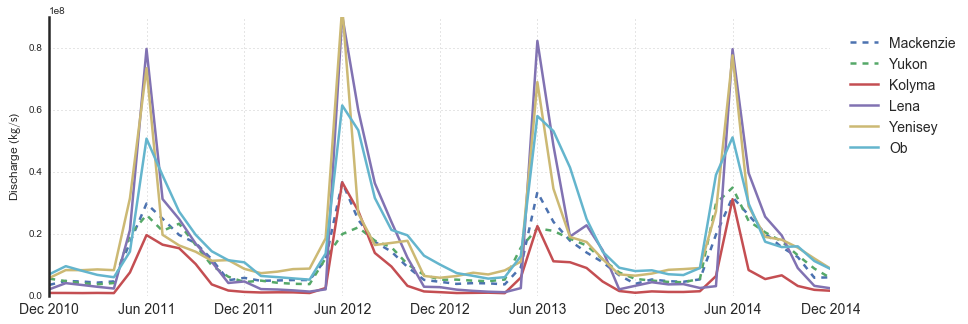

In [369]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()
#ax.yaxis.grid(True)
ax.grid(linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)\
ax.set_yticks(np.arange(0, 1.2, 0.2)*1e8); ax.set_ylim([0, 9e7])
ax.set_ylabel('Discharge ($\mathsf{kg/s}$)', fontsize=12)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xlim([date_list[-49], date_list[-1]])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
ax.plot(date_list[-49:], Mackenzie[-49:], '--', label='Mackenzie', lw=2.5)
ax.plot(date_list[-49:], Yukon[-49:], '--', label='Yukon', lw=2.5)
ax.plot(date_list[-49:], Kolyma[-49:], label='Kolyma', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Lena[-49:], label='Lena', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Yenisey[-49:], label='Yenisey', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Ob[-49:], label='Ob', lw=2.5, solid_capstyle="projecting")
#ax.set_title('The discharge of 6 largest Arctic rivers', fontsize=14)
LG=ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, prop={'size':14})

fig.savefig('../../_publish/RF_6_Rivers.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

# Compute seasonal cycle

In [198]:
t = np.arange(1, 13)
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [199]:
SC_Ma, _ = Nts.bin_season_cycle(date_list, Mackenzie)
SC_Yu, _ = Nts.bin_season_cycle(date_list, Yukon)
SC_Ko, _ = Nts.bin_season_cycle(date_list, Kolyma)
SC_Le, _ = Nts.bin_season_cycle(date_list, Lena)
SC_Ye, _ = Nts.bin_season_cycle(date_list, Yenisey)
SC_Ob, _ = Nts.bin_season_cycle(date_list, Ob)

SC_In, _ = Nts.bin_season_cycle(date_list, Indigirka)
SC_Ya, _ = Nts.bin_season_cycle(date_list, Yana)
SC_Ol, _ = Nts.bin_season_cycle(date_list, Olenek)
SC_Kh, _ = Nts.bin_season_cycle(date_list, Khatanga)
SC_Ta, _ = Nts.bin_season_cycle(date_list, Taimyra)
SC_Py, _ = Nts.bin_season_cycle(date_list, Pyasina)
SC_Pe, _ = Nts.bin_season_cycle(date_list, Pechora)

In [201]:
#heatmap_rf = [13, 12]
heatmap_SC = np.vstack([SC_Ma, SC_Yu, SC_Ko, SC_Le, SC_Ye, SC_Ob, SC_In, SC_Ya, SC_Ol, SC_Kh, SC_Ta, SC_Py, SC_Pe])

In [202]:
ylabels = ['Mackenzie', 'Yukon', 'Kolyma', 'Lena', 'Yenisey', 'Ob', 
           'Indigirka', 'Yana', 'Olenek', 'Khatanga', 'Taimyra', 'Pyasina', 'Pechora']

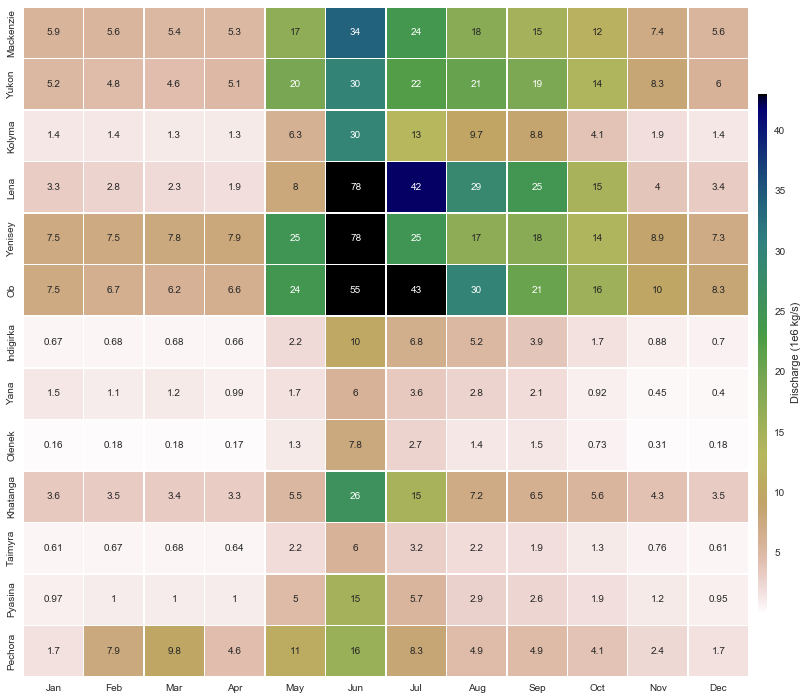

In [204]:
sb.set_style('darkgrid')
fig = plt.figure(figsize=(13, 12))
ax = fig.gca(); ax.grid()
CS = sb.heatmap(heatmap_SC*1e-6, 
           cmap=plt.cm.gist_earth_r, robust=True, cbar=False, annot=True, linewidths=.5,
           xticklabels=Mon,
           yticklabels=ylabels)
cax = fig.add_axes([0.91, 0.2, 0.01, 0.6])
cbar = ax.figure.colorbar(CS.collections[0], cax=cax)
#cbar.set_ticks(np.arange(0, 0.3, 0.05))
cbar.set_label('Discharge (1e6 kg/s)')

In [205]:
sb.set_style('white')

# Comparing with discharge measurements

* Kolyma, Lena, Yenisey, Ob: Arctic Great River Obs., AGRO
* Mackenzie, Yukon: USGS
* The period that all data is available: Jan 2003 - Dec 2013
* Use monthly data since ANHA4 runoff is monthly
* All in "$\mathsf{kg/s}$" or "$\mathsf{m^3/s}$", magnitude is about 1e7.

In [206]:
MAT_Ko = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Kolyma.mat')
dis_Ko = MAT_Ko['Kolyma_discharge_full'][:, 0]
time_Ko = datenum2datetime(MAT_Ko['time_original'][:, 0])
MAT_Le = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Lena.mat')
dis_Le = MAT_Le['Lena_discharge_full'][:, 0]
MAT_Ye = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Yenisey.mat')
dis_Ye = MAT_Ye['Yenisey_discharge_full'][:, 0]
MAT_Ob = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Ob.mat')
dis_Ob = MAT_Ob['Ob_discharge_full'][:, 0]
MAT_Ma = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Mackenzie.mat')
dis_Ma = MAT_Ma['Mackenzie_discharge_full'][:, 0]
time_Ma = datenum2datetime(MAT_Ma['time_full_selected'][:, 0])
MAT_Yu = scipy.io.loadmat('../../../../Arctic-obs/MATLAB files/Discharge_Yukon.mat')
dis_Yu = MAT_Yu['Yukon_discharge_full'][:, 0]
time_Yu = datenum2datetime(MAT_Yu['Yukon_time_full'][:, 0])

In [207]:
Le_mon_time, Le_dis_mon, _ = Nts.bin_monmean(time_Ko, dis_Le)
Ko_mon_time, Ko_dis_mon, _ = Nts.bin_monmean(time_Ko, dis_Ko)
Ye_mon_time, Ye_dis_mon, _ = Nts.bin_monmean(time_Ko, dis_Ye)
Ob_mon_time, Ob_dis_mon, _ = Nts.bin_monmean(time_Ko, dis_Ob)
Yu_mon_time, Yu_dis_mon, _ = Nts.bin_monmean(time_Yu, dis_Yu)
Ma_mon_time, Ma_dis_mon, _ = Nts.bin_monmean(time_Ma, dis_Ma)

In [241]:
len(date_list[540:-12])

132

**Pearson correlation index**

In [208]:
from scipy.stats.stats import pearsonr
corrMa, pMa = pearsonr(Ma_dis_mon, Mackenzie[540:-12])
corrYu, pYu = pearsonr(Yu_dis_mon[~np.isnan(Yu_dis_mon)], Yukon[540:-12][~np.isnan(Yu_dis_mon)])
corrKo, pKo = pearsonr(Ko_dis_mon, Kolyma[540:-12])
corrLe, pLe = pearsonr(Le_dis_mon, Lena[540:-12])
corrYe, pYe = pearsonr(Ye_dis_mon, Yenisey[540:-12])
corrOb, pOb = pearsonr(Ob_dis_mon, Ob[540:-12])

In [231]:
corrSUM = np.hstack([corrMa, corrYu, corrKo, corrLe, corrYe, corrOb])
pSUM = np.hstack([pMa, pYu, pKo, pLe, pYe, pOb])
names = ['Mackenzie', 'Yukon', 'Kolyma', 'Lena', 'Yenisey', 'Ob']

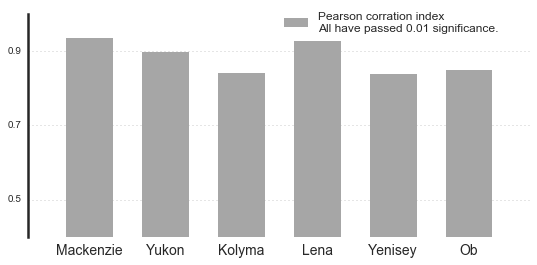

In [322]:
proxy_x = [1, 2, 3, 4, 5, 6]
proxy_xmid = [1.309, 2.309, 3.309, 4.309, 5.309, 6.309]

fig = plt.figure(figsize=(9, 4))
ax = fig.gca()

[i.set_linewidth(2.5) for i in ax.spines.itervalues()]
ax.grid(linestyle=':', zorder=0)
ax.xaxis.grid(False)
ax.set_yticks(np.arange(0.1, 1, 0.2)); ax.set_ylim(0.4, 1); ax.set_xlim(0.5, 7.118)
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
    labelbottom="on", left="off", right="off", labelleft="on")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)

ax.bar(proxy_x, corrSUM, width=0.618, lw=0, color=[0.65, 0.65, 0.65],
       label='Pearson corration index\nAll have passed 0.01 significance.')
#for i in range(6):
#    ax.text(proxy_x[i], corrSUM[i]+0.025, 'p = '+str(pSUM[i]))
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.5, 1.03), loc=2, borderaxespad=0., prop={'size':12}); LG.draw_frame(False)
ax.set_xticklabels(names, fontsize=14); ax.set_xticks(proxy_xmid)
#ax.set_title('', x=0.2, y=0.9, fontsize=14)

**Difference**

In [261]:
bias_Ma = Mackenzie[540:-12]-Ma_dis_mon*1e3
bias_Yu = Yukon[540:-12]-Yu_dis_mon*1e3
bias_Ko = Kolyma[540:-12]-Ko_dis_mon*1e3
bias_Le = Lena[540:-12]-Le_dis_mon*1e3
bias_Ye = Yenisey[540:-12]-Ye_dis_mon*1e3
bias_Ob = Ob[540:-12]-Ob_dis_mon*1e3

bias_martix = np.vstack([bias_Ma, bias_Yu, bias_Ko, bias_Le, bias_Ye, bias_Ob])

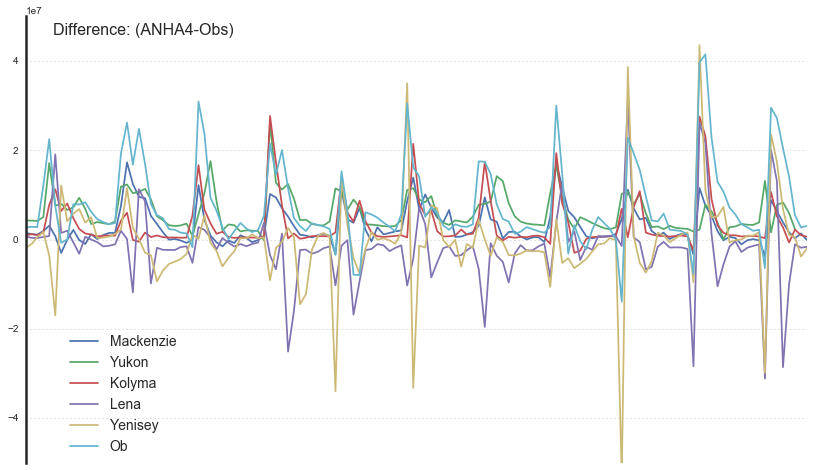

In [339]:
fig = plt.figure(figsize=(14, 8))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_yticks(np.arange(-0.6, 0.8, 0.2)*1e8); ax.set_ylim([-0.5e8, 0.5e8])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="off", left="off", right="off", labelleft="on")

ax.plot(date_list[540:-12], Mackenzie[540:-12]-Ma_dis_mon*1e3, label='Mackenzie')
ax.plot(date_list[540:-12], Yukon[540:-12]-Yu_dis_mon*1e3, label='Yukon')
ax.plot(date_list[540:-12], Kolyma[540:-12]-Ko_dis_mon*1e3, label='Kolyma')
ax.plot(date_list[540:-12], Lena[540:-12]-Le_dis_mon*1e3, label='Lena')
ax.plot(date_list[540:-12], Yenisey[540:-12]-Ye_dis_mon*1e3, label='Yenisey')
ax.plot(date_list[540:-12], Ob[540:-12]-Ob_dis_mon*1e3, label='Ob')
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.05, 0.3), loc=2, borderaxespad=0., prop={'size':14}); LG.draw_frame(False)
ax.set_title('Difference: (ANHA4-Obs)', fontsize=16, y=0.95, x=0.15)

**Seasonal Cycle**

In [282]:
SC_Ma2, _ = Nts.bin_season_cycle(date_list[540:-12], Ma_dis_mon*1e3)
SC_Yu2, _ = Nts.bin_season_cycle(date_list[540:-12], Yu_dis_mon*1e3)
SC_Ko2, _ = Nts.bin_season_cycle(date_list[540:-12], Ko_dis_mon*1e3)
SC_Le2, _ = Nts.bin_season_cycle(date_list[540:-12], Le_dis_mon*1e3)
SC_Ye2, _ = Nts.bin_season_cycle(date_list[540:-12], Ye_dis_mon*1e3)
SC_Ob2, _ = Nts.bin_season_cycle(date_list[540:-12], Ob_dis_mon*1e3)

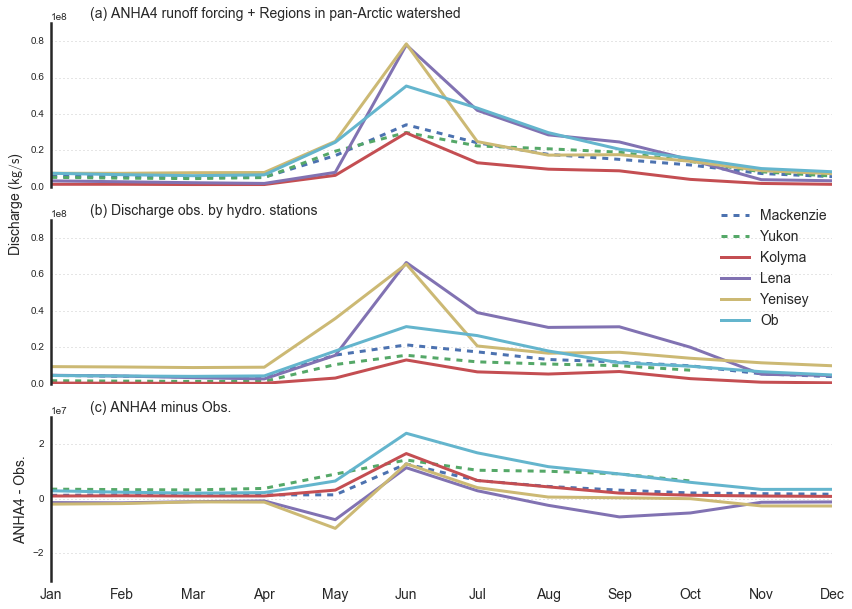

In [366]:
fig = plt.figure(figsize=(14, 10))

ax1=plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((3, 1), (1, 0), colspan=1, rowspan=1)
ax3=plt.subplot2grid((3, 1), (2, 0), colspan=1, rowspan=1)
AX = [ax1, ax2, ax3]

for i in range(3):
    ax = AX[i]
    ax.grid(linestyle=':')
    ax.xaxis.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False) 
    ax.spines["right"].set_visible(False)
    ax.set_xticks(range(1, 13)); 
    ax.set_yticks(np.arange(0, 1.2, 0.2)*1e8); ax.set_ylim([0, 9e7])
    [i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
    ax.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")
ax3.set_yticks(np.arange(-0.4, 0.6, 0.2)*1e8); ax3.set_ylim([-0.3e8, 0.3e8])    
ax3.tick_params(labelbottom="on")
ax3.set_xticklabels(Mon, fontsize=14)
ax2.set_ylabel('Discharge ($\mathsf{kg/s}$)', y=1.1, fontsize=14)
ax3.set_ylabel('ANHA4 - Obs.', fontsize=14)

ax1.plot(t, SC_Ma, '--', solid_capstyle="projecting", label='Mackenzie', lw=3)
ax1.plot(t, SC_Yu, '--', solid_capstyle="projecting", label='Yukon', lw=3)
ax1.plot(t, SC_Ko, solid_capstyle="projecting", label='Kolyma', lw=3)
ax1.plot(t, SC_Le, solid_capstyle="projecting", label='Lena', lw=3)
ax1.plot(t, SC_Ye, solid_capstyle="projecting", label='Yenisey', lw=3)
ax1.plot(t, SC_Ob, solid_capstyle="projecting", label='Ob', lw=3)
ax1.set_title("(a) ANHA4 runoff forcing + Regions in pan-Arctic watershed", x=0.05, loc='left', fontsize=14)

ax2.plot(t, SC_Ma2, '--', solid_capstyle="projecting", label='Mackenzie', lw=3)
ax2.plot(t, SC_Yu2, '--', solid_capstyle="projecting", label='Yukon', lw=3)
ax2.plot(t, SC_Ko2, solid_capstyle="projecting", label='Kolyma', lw=3)
ax2.plot(t, SC_Le2, solid_capstyle="projecting", label='Lena', lw=3)
ax2.plot(t, SC_Ye2, solid_capstyle="projecting", label='Yenisey', lw=3)
ax2.plot(t, SC_Ob2, solid_capstyle="projecting", label='Ob', lw=3)
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.85, 1.1), loc=2, borderaxespad=0., prop={'size':14}); LG.draw_frame(False)
ax2.set_title("(b) Discharge obs. by hydro. stations", x=0.05, loc='left', fontsize=14)

ax3.plot(t, SC_Ma-SC_Ma2, '--', solid_capstyle="projecting", label='Mackenzie', lw=3)
ax3.plot(t, SC_Yu-SC_Yu2, '--', solid_capstyle="projecting", label='Yukon', lw=3)
ax3.plot(t, SC_Ko-SC_Ko2, solid_capstyle="projecting", label='Kolyma', lw=3)
ax3.plot(t, SC_Le-SC_Le2, solid_capstyle="projecting", label='Lena', lw=3)
ax3.plot(t, SC_Ye-SC_Ye2, solid_capstyle="projecting", label='Yenisey', lw=3)
ax3.plot(t, SC_Ob-SC_Ob2, solid_capstyle="projecting", label='Ob', lw=3)
ax3.set_title("(c) ANHA4 minus Obs.", x=0.05, loc='left', fontsize=14)

# Conclusion
* ANHA4 runoff focing (or the estimation of *Dai & Trenberth*) may overestimate the discharge in Jun and underestimate in Spring. 
* The regions defined in my research can characterize these rivers well and do not create big extra bias.